<a href="https://colab.research.google.com/github/mgovindasamy/Machine-Learning-Examples/blob/master/Auto-ml-daily-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/mgovindasamy/Machine-Learning-Examples/blob/master/Auto-ml-daily-sales.ipynb)

In [29]:
!pip3 install auto-ts
!pip install dask distributed --upgrade

     |████████████████████████████████| 837 kB 8.7 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


**Import AUTO-ML packages and load Telecom Churn dataset**

In [10]:
from auto_ts import auto_timeseries
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np
import plotly.express as px

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/mgovindasamy/Machine-Learning-Examples/master/day_product_purchase.csv')

train_df=df[(df['CREATION_DATE'] >= '2006-11-04	') & (df['CREATION_DATE'] <= '2019-03-31')]
test_df=df[(df['CREATION_DATE'] > '2019-03-31')]

In [30]:
train_df.head()

,CREATION_DATE,PAYMENT_IN_USD,Transaction_Type
0,2006-11-04 00:00:00,0,product purchase
1,2006-11-05 00:00:00,0,product purchase
2,2006-11-06 00:00:00,7,product purchase
3,2006-11-07 00:00:00,0,product purchase
4,2006-11-08 00:00:00,15,product purchase


In [6]:
#train_df.set_index("CREATION_DATE", inplace=True)
#test_df.set_index("CREATION_DATE", inplace=True)

In [31]:
train_df['Daily']=pd.to_datetime(train_df['CREATION_DATE'])
test_df['Daily']=pd.to_datetime(test_df['CREATION_DATE'])
train_df=train_df.drop('Transaction_Type',axis=1)
test_df=test_df.drop('Transaction_Type',axis=1)
train_df=train_df.drop('CREATION_DATE',axis=1)
test_df=test_df.drop('CREATION_DATE',axis=1)

In [32]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 4516
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAYMENT_IN_USD  4517 non-null   int64         
 1   Daily           4517 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 105.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 4517 to 5609
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAYMENT_IN_USD  1093 non-null   int64         
 1   Daily           1093 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 25.6 KB


In [33]:
model = auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [34]:
fig = px.line(train_df, x='Daily', y='PAYMENT_IN_USD', title='Product Purchase')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [35]:
train_df.reset_index(inplace=True)

In [36]:
train_df.head()

,index,PAYMENT_IN_USD,Daily
0,0,0,2006-11-04
1,1,0,2006-11-05
2,2,7,2006-11-06
3,3,0,2006-11-07
4,4,15,2006-11-08


Start of Fit.....
    Target variable given as = PAYMENT_IN_USD
Start of loading of data.....
    Inputs: ts_column = Daily, sep = ,, target = ['PAYMENT_IN_USD']
    Using given input: pandas dataframe...
    Daily column exists in given train data...
    train data shape = (4517, 2)
Alert: Could not detect strf_time_format of Daily. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Alert! Data is not stationary even after two differencing. Continuing...
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding

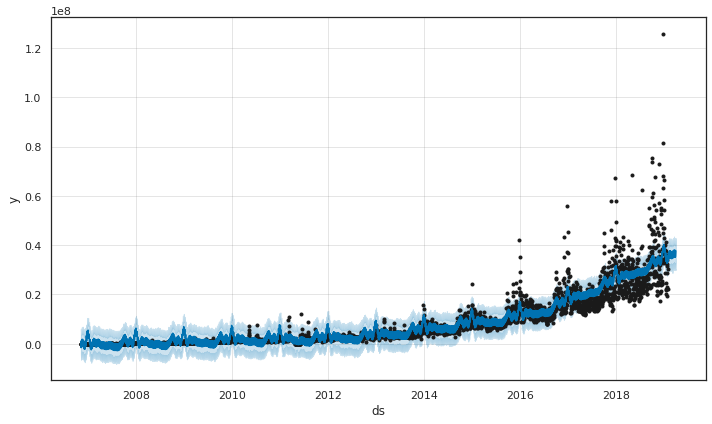

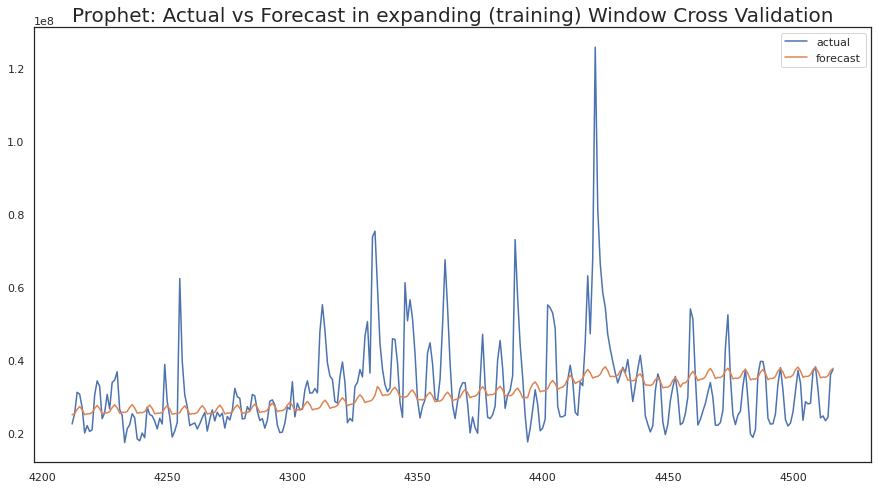

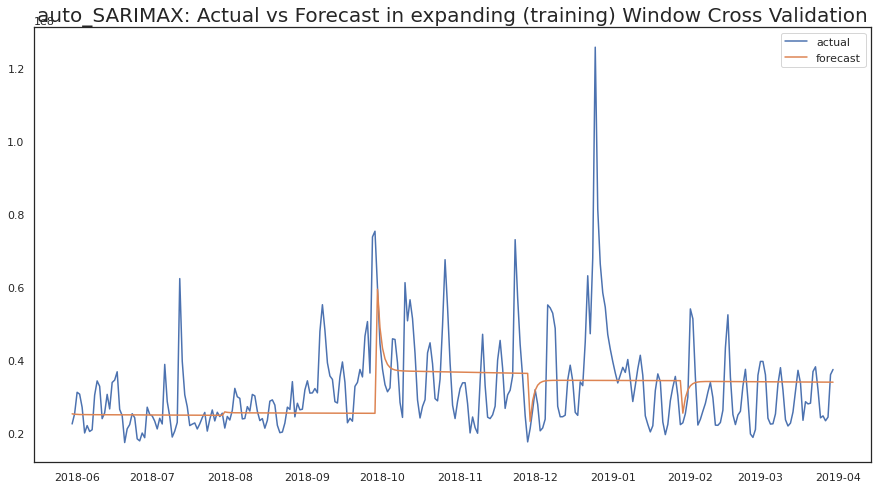

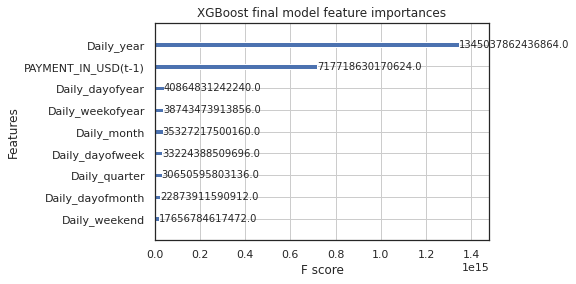

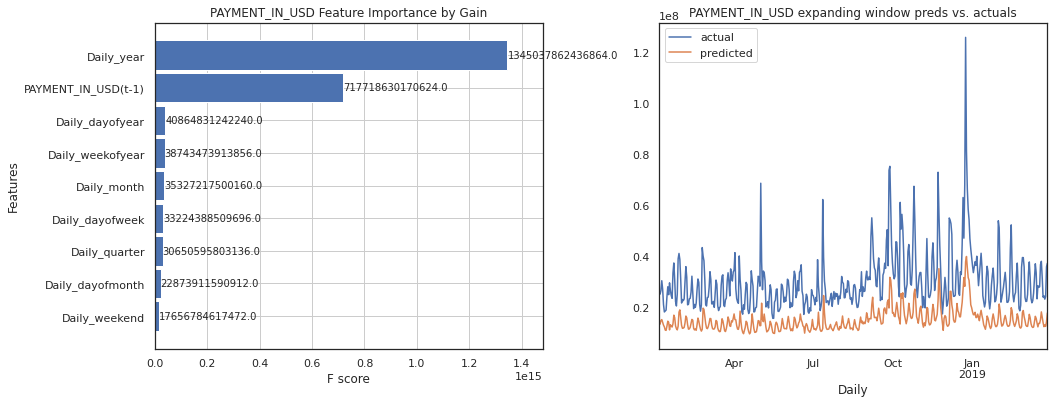

In [37]:
model.fit(traindata= train_df, 
          ts_column="Daily",
          target="PAYMENT_IN_USD")

In [ ]:
future_predictions = model.predict(testdata=61)

In [20]:
 test_df.reset_index(inplace=True)

,CREATION_DATE,PAYMENT_IN_USD,Daily
0,2006-11-04 00:00:00,0,2006-11-04
1,2006-11-05 00:00:00,0,2006-11-05
2,2006-11-06 00:00:00,7,2006-11-06
3,2006-11-07 00:00:00,0,2006-11-07
4,2006-11-08 00:00:00,15,2006-11-08
...,...,...,...
5605,2022-03-23 00:00:00,49911103,2022-03-23
5606,2022-03-24 00:00:00,43673446,2022-03-24
5607,2022-03-25 00:00:00,53060683,2022-03-25
5608,2022-03-26 00:00:00,57454508,2022-03-26


In [25]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values

In [26]:
test_df.head()

CREATION_DATE             object
PAYMENT_IN_USD             int64
Daily             datetime64[ns]
dtype: object

In [ ]:
test_df.set_index("Date", inplace=True)

In [ ]:
test_df.head(3)

In [ ]:
test_df["Sales"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df["Prophet Predictions"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()